### Train all ML model using MOM6 data

In [1]:
import sys
sys.path.append('../../modules/')

%reload_ext autoreload
%autoreload 2
import datasets
import ML_classes

import matplotlib.pyplot as plt

2024-09-28 21:01:18.524164: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 21:01:18.524202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 21:01:18.525664: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
MOM6_bucket = 'gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/'
L = 'all'

In [3]:
ML_data = datasets.MOM6_all_transformer('-', 'all')

In [4]:
ML_data.read_datatree(MOM6_bucket)
ML_data.generate_test_train_batches()

Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_50km.zarr
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_100km.zarr
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_200km.zarr
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_400km.zarr
Subsampling
Loaded from saved norm nc for all.
Test and train batches split. Number of batches: 37-5


In [5]:
ML_data.ML_dataset

<xarray.Dataset> Size: 48MB
Dimensions:  (Time: 7200, yh: 10, xh: 15)
Coordinates:
  * Time     (Time) object 58kB 0001-01-11 00:00:00 ... 0198-02-16 00:00:00
  * xh       (xh) float64 120B 40.0 120.0 200.0 ... 1e+03 1.08e+03 1.16e+03
  * yh       (yh) float64 80B 440.0 520.0 600.0 ... 1e+03 1.08e+03 1.16e+03
    zl       float64 8B 1.033e+03
Data variables:
    Sfnx     (Time, yh, xh) float64 9MB dask.array<chunksize=(72, 10, 15), meta=np.ndarray>
    Sfny     (Time, yh, xh) float64 9MB dask.array<chunksize=(72, 10, 15), meta=np.ndarray>
    U_x      (Time, yh, xh) float32 4MB dask.array<chunksize=(72, 10, 15), meta=np.ndarray>
    U_y      (Time, yh, xh) float32 4MB dask.array<chunksize=(72, 10, 15), meta=np.ndarray>
    V_x      (Time, yh, xh) float32 4MB dask.array<chunksize=(72, 10, 15), meta=np.ndarray>
    V_y      (Time, yh, xh) float32 4MB dask.array<chunksize=(72, 10, 15), meta=np.ndarray>
    Sx       (Time, yh, xh) float32 4MB dask.array<chunksize=(72, 10, 15), meta=np.ndarray>
    Sy       (Time, yh, xh) float32 4MB dask.array<chunksize=(72, 10, 15), meta=np.ndarray>
    Lfilt    (Time, yh, xh) float32 4MB dask.array<chunksize=(72, 10, 15), meta=np.ndarray>

In [10]:
ML_data.norm_factors.load()

<xarray.Dataset> Size: 72B
Dimensions:  ()
Data variables:
    Sfnx     float64 8B 3.121
    Sfny     float64 8B 3.817
    U_x      float64 8B 7.55e-07
    U_y      float64 8B 1.27e-06
    V_x      float64 8B 1.349e-06
    V_y      float64 8B 7.487e-07
    Sx       float64 8B 0.001096
    Sy       float64 8B 0.001004
    Lfilt    float64 8B 133.4

In [12]:
ML_data.datatree['100'].Time

<xarray.DataArray 'Time' (Time: 7200)> Size: 58kB
array([cftime.DatetimeJulian(1, 1, 11, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1, 1, 21, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1, 1, 31, 0, 0, 0, 0, has_year_zero=False), ...,
       cftime.DatetimeJulian(198, 1, 27, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(198, 2, 6, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(198, 2, 16, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * Time     (Time) object 58kB 0001-01-11 00:00:00 ... 0198-02-16 00:00:00
    zl       float64 8B 1.033e+03

In [13]:
7200*.9

6480.0

In [6]:
ML_data.ds_train

<xarray.Dataset> Size: 414MB
Dimensions:  (points: 3983040)
Coordinates:
    zl       float64 8B 1.033e+03
  * points   (points) object 32MB MultiIndex
  * Time     (points) object 32MB 0097-02-06 00:00:00 ... 0142-03-12 00:00:00
  * xh       (points) float64 32MB 1.028e+03 10.0 1.06e+03 ... 1.05e+03 260.0
  * yh       (points) float64 32MB 1.044e+03 410.0 660.0 ... 440.0 570.0 900.0
Data variables:
    Sfnx     (points) float64 32MB 0.02135 -0.05084 0.863 ... -0.1172 2.11
    Sfny     (points) float64 32MB -0.03304 0.09966 -4.272 ... -0.3479 -1.348
    U_x      (points) float64 32MB -0.5921 -0.1761 -0.2615 ... 2.548 -0.3072
    U_y      (points) float64 32MB -0.547 -0.06322 -0.3675 ... -1.13 -1.111
    V_x      (points) float64 32MB 0.7603 0.4109 1.424 ... 0.04078 0.7391 0.9606
    V_y      (points) float64 32MB 0.596 0.1386 0.009004 ... -2.458 0.2386
    Sx       (points) float64 32MB -0.7585 0.4331 -2.087 ... -0.1335 -1.04
    Sy       (points) float64 32MB 0.1309 0.5829 0.5882 ... 0.3423 1.25 -0.7159
    Lfilt    (points) float64 32MB 0.3748 0.7497 1.499 ... 2.999 0.7497 1.499

In [14]:
len(ML_data.ds_train.points)

3983040

(array([1.4000e+01, 1.3100e+02, 7.7800e+02, 4.8560e+03, 3.0089e+04,
        6.0318e+04, 9.3290e+03, 1.8300e+03, 2.7200e+02, 3.2000e+01]),
 array([-6.94263846, -5.60360237, -4.26456628, -2.92553019, -1.58649409,
        -0.247458  ,  1.09157809,  2.43061418,  3.76965027,  5.10868637,
         6.44772246]),
 <BarContainer object of 10 artists>)

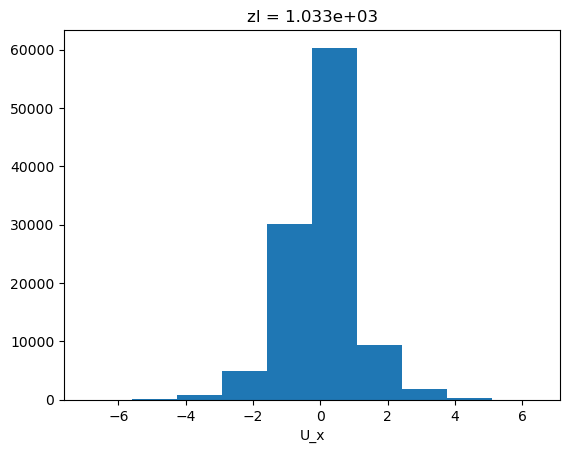

In [16]:
ML_data.bgen_train[0].U_x.plot.hist()

In [17]:
len(ML_data.input_channels)

7

In [19]:
# Setup ML model
ANN_model = ML_classes.ANN(shape=[36,36,2],num_in = len(ML_data.input_channels))
regress_sys = ML_classes.RegressionSystem(ANN_model)


In [20]:
ANN_model.count_parameters()

1694


In [21]:
%%time
regress_sys.train_system(ML_data, num_epoch=21, print_freq=2)

Train loss step 0:  0.7754773948643658 test loss: 0.5077055335044861
Train loss step 2:  0.337055163609015 test loss: 0.2821998655796051
Train loss step 4:  0.28146649695731496 test loss: 0.24858266711235047
Train loss step 6:  0.2674875758789681 test loss: 0.2375195652246475
Train loss step 8:  0.2606369716090125 test loss: 0.23210290670394898
Train loss step 10:  0.2563594547477928 test loss: 0.22906108498573302
Train loss step 12:  0.25294990918120824 test loss: 0.22576572000980377
Train loss step 14:  0.250414173345308 test loss: 0.22327854931354524
Train loss step 16:  0.24811367207282298 test loss: 0.2214128404855728
Train loss step 18:  0.2462643638655946 test loss: 0.22022880911827086
Train loss step 20:  0.24511631558070313 test loss: 0.21864092946052552
CPU times: user 2min 19s, sys: 2.34 s, total: 2min 21s
Wall time: 1min 15s


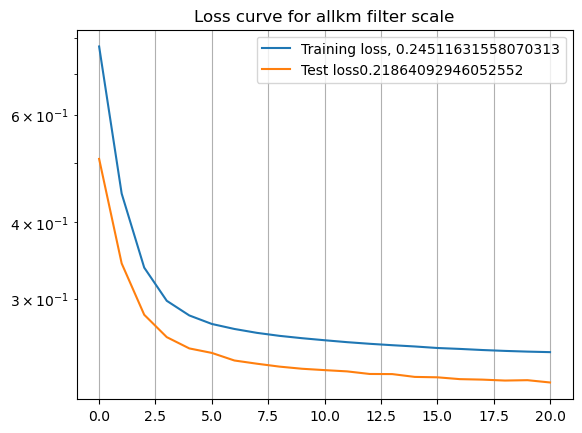

In [22]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.title('Loss curve for '+ L+ 'km filter scale')
plt.grid()
plt.yscale('log')
plt.legend()

#plt.savefig('figures/MOM6_'+L+'km_loss_curve_36_36.png')

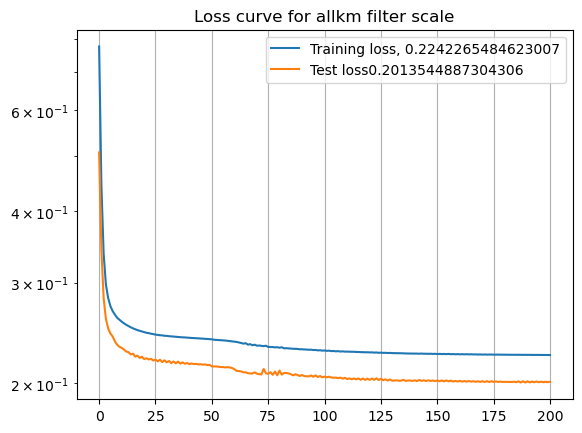

In [7]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.title('Loss curve for '+ L+ 'km filter scale')
plt.grid()
plt.yscale('log')
plt.legend()

plt.savefig('figures/MOM6_'+L+'km_loss_curve_36_36.png')

In [8]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_'+L+'_MOM6_P2L_36_36'#+'_'+str(bias)
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_P2L_'+L+'_36_36.nc'
regress_sys.save_weights_nc(model_nc)